# <span style="color:darkred">Aula 01 - Dados Estruturados e não Estruturados</span>

## 1. Dados não estruturados

Símbolos organizados em documentos de vários formatos.

Seu propósito é serem lidos e analisados por humanos dentro de um contexto cultural.

Como humanos temos capacidades de compreender dados não estruturados pois podemos:

- interpretar mistura de símbolos e elementos 
- detectar e corrigir erros
- preencher informacoes faltantes
- lidar com ambiguidade
- reconhecer e compreender humor e sentimentos por meio de elementos complexos

Por isso são de **difícil análise automática/computacional**

In [2]:
#Importando as bases
import imageio
import numpy as np
import matplotlib.pyplot as plt


**Exemplo - comparando imagens**

Imagens são exemplos de objetos não estruturados, pois seu conteúdo é projetado para interpretacão humana.

Vamos carregar duas imagens relacionadas a uma palavra chave: "cebolinha"

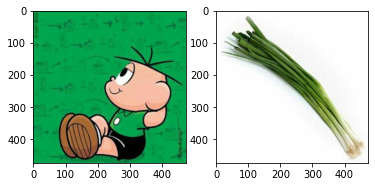

In [19]:
import imageio
import numpy as np
import matplotlib.pyplot as plt

# carregar e exibir imagens da "base de dados"
img1 = imageio.imread("D:/Dropbox/OneDrive/06 - MBA USP/04 - Tratamento de dados/04 - Pictures/cebolinha2.jpg")
img2 = imageio.imread("D:/Dropbox/OneDrive/06 - MBA USP/04 - Tratamento de dados/04 - Pictures/cebolinha3.jpg")

plt.subplot(121)
plt.imshow(img1)
plt.subplot(122)
plt.imshow(img2)

Nesse exemplo, vamos considerar que essas são as imagens de *referência* sobre o conceito **cebolinha** e agora vamos obter uma nova imagem, de consulta, a qual queremos comparar com as duas imagens de referência.

Vamos computar a distância entre a imagem de consulta, e ambas imagens referência, e considerar mais similar aquela com a menor distância. Imagens estão em formato binário, e podem ser vistas como sequências de bytes.

Há várias formas de calcular a distância. Seja um par de objetos a serem comparados: $A$ e $B$, cada um contendo elementos $i=1 \cdots N$, então a distância Euclidiana é:

$$ d(A,B) = \sqrt{ \sum_{i}^N (A_i - B_i)^2 } $$


In [23]:
# carregar imagem de consulta e codificar funcao de distancia
# computar as distancias e exibir
imgQ = imageio.imread("D:/Dropbox/OneDrive/06 - MBA USP/04 - Tratamento de dados/04 - Pictures/cebolinha1.jpg")

def img_distance(A, B):
    """ Calcula a distancia Euclidiana entre dois vetores de mesmo tamanho"""
    return  np.sqrt( np.sum((A-B)**2) )

dQ1 = img_distance(imgQ, img1)
dQ2 = img_distance(imgQ, img2)

print("Imagem da esquerda:", dQ1)
print("Imagem da direita:",dQ2)

Imagem da esquerda: 7850.7686884788545
Imagem da direita: 5827.087265521257


Notamos que, pela distância Euclidiana, a imagem da direita é a mais similar! Vamos revelar a imagem de consulta:

674028


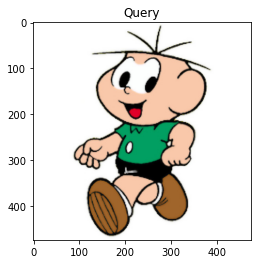

In [24]:
# mostrar imagem de consulta
plt.imshow(imgQ)
plt.title('Query')

print(np.product(imgQ.shape))

O mesmo pode ocorrer com documentos em geral, textos, etc.

Isso mostra que trabalhar com dados não estruturados pode ser não trivial!

Exemplos de documentos não estruturados:
* emails, 
* artigos,
* documentos em PDF,
* comentários e postagens em redes sociais,
* interacão entre consumidores,
* áudio,
* dados adquiridos por sensores

Características de dados não estruturados:
* **binários** e/ou **caracteres**
* **alta flexibilidade** (não possuem esquema)
* **coleta** feita com baixo **controle** (*in the wild*)
* **não verificados** / **não certificados**
* possuem alta **redundância**
* possuem alta **dimensionalidade**

## 2. Dados estruturados

Dados cujos elementos são *endereçáveis*, facilitando armazenamento e recuperação, organizados em um repositório formatado.

Em contrapartida aos dados não-estruturados nos quais não há um esquema que mostre o atributo ou a informação que eu desejaria recuperar mas que não é disponível de forma direta.

Dados estruturados estão prontos para ser armazenados em **bases de dados relacionais**, por exemplo:

 username     | Primeiro Nome  | Sobrenome | Ano de nascimento
 :------ |:--------- |:----- | --- | 
 joao@provider.com     | João | Oliveira | 1996
 bet89@hoster.net    | Elizabete | Costa Silva | 1989
 maria@internet.com.br | Maria Cláudia | Nunes de Souza | 1976
 
 transpondo informações das imagens que mostramos no caso não estruturado:

 ID     | Conceito  | Categoria
 ------ |:---------:| -----:|
 01     | Cebolinha | Personagem
 02     | Cebolinha | Personagem
 03     | Cebolinha | Alimento
 
 Mas note que as informações estruturadas não são suficientes para dar uma idéia completa da imagem a que nos referimos! Em particular, os IDs 01 e 02 tem exatamente os mesmos dados estruturados.
 
 
 #### Terminologia de bases relacionais
 
 * **Campo, atributo ou variável**: um elemento específico para o qual temos dados, por exemplo: username na primeira tabela mostrada, relativo a *coluna* da tabela
 * **Tupla ou registro**: um conjunto de valores de atributos, por exemplo: (joao@provider.com, João, Oliveira, 1996), relativo à *linha* da tabela
 * **Tabela ou relação**: conjunto de linhas e colunas compartilhando os mesmos atributos, organizando a mesma informação acerca de um tipo de objeto
 
 Em dados estruturados podemos ainda definir relações com outros dados.
 
 Por exemplo, definimos duas tabelas, a primeira para a imagem, e a segunda para conceitos.

*Tabela 1 - Conceitos*
 
 ID_c     | Descricão |
 ------ |:---------:|
 1     | Cebolinha |
 2     | Coentro |
 

*Tabela 2 - Imagens*
 
 
 ID_i   | Conceito (Conceitos->ID_c)  | Categoria
 ---- |:---:| -----:|
 01   |  1  | Personagem
 02   |  1  | Personagem
 03   |  1  | Alimento
 04   |  2  | Alimento
 
 
 Aqui, temos esquema, e podemos definir que, por exemplo:
 - ID_c, ID_i e Conceito são sempre números inteiros
 - ID_c não pode se repetir em tuplas distintas na tabela
 - ID_i não pode se repetir em tuplas distintas na tabela
 - Conceito pode conter apenas valores que existam em ID_c na tabela Conceitos

A possibilidade de realizar validação e controle de entrada torna esses dados mais confiáveis.

Finalmente, é possível projetar **buscas** para recuperar informação de forma eficiente!

In [25]:
conceitos = { 'ID_c' : [1, 2],
              'Descricao': ['Cebolinha', 'Coentro']}


imagens = {'ID_i':      [1,2,3,4],
           'Conceito' : [1,1,1,2],
           'Categoria': ['Personagem',
                         'Personagem',
                         'Alimento',
                         'Alimento']
          }

import pandas as pd
df_conc = pd.DataFrame(conceitos)
df_imag = pd.DataFrame(imagens)

print(df_conc)
print()
print(df_imag)

   ID_c  Descricao
0     1  Cebolinha
1     2    Coentro

   ID_i  Conceito   Categoria
0     1         1  Personagem
1     2         1  Personagem
2     3         1    Alimento
3     4         2    Alimento


In [26]:
df_imag[ df_imag['Categoria']=='Alimento' ]

,ID_i,Conceito,Categoria
2,3,1,Alimento
3,4,2,Alimento


In [27]:
c = df_conc[ df_conc['Descricao'] == 'Cebolinha']

# use com cuidado, só funciona se a consulta anterior retornar alguma linha
df_imag[df_imag['Conceito'] == c.iloc[0]['ID_c']]

,ID_i,Conceito,Categoria
0,1,1,Personagem
1,2,1,Personagem
2,3,1,Alimento


## 3. Resumo e considerações finais

Dados não estruturados:
* representam grande parte dos dados disponíveis, tanto em sistemas privados quanto publicamente
* continua a crescer devido a
    - menor custo e facilidade de aquisição
    - dispositivos móveis conectados

Dados estruturados:
* robustos
* fáceis de versionar
* mais confiáveis
* maior custo de manutenção

**Muitos esforços são direcionados a obter dados estruturados a partir de dados não estruturados!**

Nesse processo uma série de escolhas precisam ser feitas para ter sucesso no resultado desejado.

## 4) Problemas típicos em bases de dados

* bases de dados, ainda que estruturadas, possuem problemas
* a regra 80/20 diz que **80%** do tempo dos cientistas de dados é gasto **encontrando, limpando e organizando dados**
* *não reconhecer esses problemas e ignorá-los pode levar a conclusões erradas na fase de análise.*


### 4.1) Informações faltantes (*missing data*)

#### Razões para dados faltantes

A maior causa da existência de dados faltantes está no projeto do protocolo de *coleta de dados* e na sua execução.

Podemos observar as seguintes fontes de dados faltantes:

* Omissão / não preenchimento de campo:
    * usuário esqueceu
    * usuário escolheu não preencher por não saber como preencher
    * usuário preferiu não preencher com receio da interpretação da resposta
    
* Dados perdidos: 
    * na digitação (quando em papel), 
    * na transferência de dados 
    * na migração de bases de dados 
    * na conversão entre formatos de arquivos    
    
    
* Erro de programação

### 4.2) Tipo do dado faltante

Seja $V$ o conjunto de todas as observações em um conjunto de dados. 

$V$ é particionado em $V_c$ e $V_m$, sendo que:
* $V_c \subseteq V$ são as observações completas em todos os campos/atributos,
* $V_m \subseteq V$ são as observações com ao menos um campo/atributo faltante (*missing*),

### *4.2.1) Faltantes completamente aleatórios** ou *missing completely at random (MCAR)*:
 
- a probabilidade de $V_m$ ser faltante é independente de $V_m$ e independente de qualquer outra observação $X \in V_c$ no dataset;

- pode ser visto como o caso em que qualquer dado tem a mesma chance de estar faltando;

- *exemplo*: ao avaliar um produto os clientes decidem reportar ou não a sua satisfação jogando cara-ou-coroa;
    
- *nesse caso:* $V_c$ são uma amostra representativa de todas as outras, e podem ser usadas para completar $V_m$

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

data_mcar = pd.read_csv("D:/Dropbox/OneDrive/06 - MBA USP/04 - Tratamento de dados/03 - Bases/TACTD_01B_Dadosfaltantes_MCAR.csv", sep=',', header=0)

print("Número de observacoes na base de dados: ", data_mcar.shape[0])
data_mcar[:10]

Número de observacoes na base de dados:  30


,e-mail,Name,Sex,Rate
0,eug_ewell@live.com,Eugenio Ewell,M,NaN
1,NaN,Ivo Izidro,M,5.0
2,multiplx@mac.com,Lindsey Lever,NaN,3.0
3,bader@sbcglobal.net,Desiree Dardar,F,NaN
4,nasarius@aol.com,Mariann Mulero,F,3.0
5,jusdisgi@outlook.com,Kathey Kleiman,F,4.0
6,rrollison@aol.com,Rupert Rollison,M,2.0
7,seymoress@aol.com,Signe Seymore,F,NaN
8,loralemo@gmail.com,Lora Lemoine,F,4.0
9,NaN,Leanne Lowy,F,4.0


Digamos que estamos interessados nas avaliacoes realizadas, ou seja "Rate", vamos ver as estatísticas descritivas desse atributo

In [30]:
data_mcar['Rate'].describe()

count    24.000000
mean      3.500000
std       1.215838
min       1.000000
25%       3.000000
50%       4.000000
75%       4.000000
max       5.000000
Name: Rate, dtype: float64

Mas sabemos que há dados faltantes, então vamos olhar especificamente para eles

In [31]:
# observando os dados de avaliacoes que sao nulos
data_mcar[data_mcar['Rate'].isnull()]

,e-mail,Name,Sex,Rate
0,eug_ewell@live.com,Eugenio Ewell,M,NaN
3,bader@sbcglobal.net,Desiree Dardar,F,NaN
7,seymoress@aol.com,Signe Seymore,F,NaN
13,cobree@aol.com,Carlos Cobre,M,NaN
18,agapow@comcast.net,Ricardo Rima,M,NaN
24,NaN,Herta Hatley,NaN,NaN


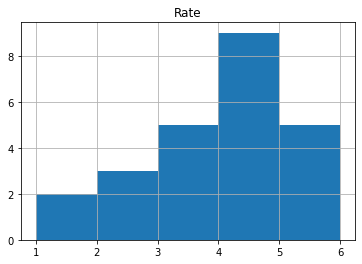

In [32]:
# olhando para a distribuicao dos dados...
hist = data_mcar.hist(bins=np.arange(1,7))

Aparentemente, não há uma causa dos dados faltantes, então temos um cenário **MCAR**, para o qual existem várias técnicas disponíveis para minimizar o efeito de dados faltantes.

Note que $V_m$, mostradas acima não parece ter qualquer relação com os valores de $V_m$ nem com outras variáveis $V_c$ observadas.

### *4.2.2) Faltantes (condicionalmente) aleatórios ou missing at random (MAR)*:

- a probabilidade de $V_m$ ser faltante é independente de $V_m$, mas está relacionada a outras variáveis $V_c$ (para os quais há dados disponíveis) no dataset.

- *exemplo*: ao revisar um serviço contratado online, *homens* tendem a omitir a satisfação sobre o serviço, mas isso *não* tem nada a ver com seu nível de satisfação.

- *nesse caso:* $V_c$ são uma amostra representativa apenas para certo conjunto de observações.

In [33]:
data_mar = pd.read_csv("D:/Dropbox/OneDrive/06 - MBA USP/04 - Tratamento de dados/03 - Bases/TACTD_01B_Dadosfaltantes_MAR.csv")

data_mar[:10]

,e-mail,Name,Sex,Rate
0,eug_ewell@live.com,Eugenio Ewell,M,4.0
1,iizi@yahoo.ca,Ivo Izidro,M,NaN
2,multiplx@mac.com,Lindsey Lever,M,3.0
3,bader@sbcglobal.net,Desiree Dardar,F,3.0
4,nasarius@aol.com,Mariann Mulero,F,3.0
5,jusdisgi@outlook.com,Kathey Kleiman,F,4.0
6,rrollison@aol.com,Rupert Rollison,M,2.0
7,seymoress@aol.com,Signe Seymore,F,4.0
8,loralemo@gmail.com,Lora Lemoine,F,4.0
9,leanne99@comcast.net,Leanne Lowy,F,4.0


Observar os dados visualmente pode não significar muito... vamos usar estatística descritiva e depois olhar apenas para os dados faltantes

In [34]:
data_mar.describe()

,Rate
count,24.000000
mean,3.458333
std,1.102533
min,1.000000
25%,3.000000
50%,4.000000
75%,4.000000
max,5.000000


In [35]:
# observando os dados de avaliacoes que sao nulos
data_mar[data_mar['Rate'].isnull()]

,e-mail,Name,Sex,Rate
1,iizi@yahoo.ca,Ivo Izidro,M,NaN
12,kk@verizon.net,Kraig Kriner,M,NaN
18,agapow@comcast.net,Ricardo Rima,M,NaN
23,joelw@live.com,Elias Elmo,M,NaN
25,jaju@mac.com,Jada Judon,M,NaN
27,njpayne@comcast.net,Lillian Labree,F,NaN


In [36]:
data_mar[data_mar['Sex']=='F'].describe()

,Rate
count,17.000000
mean,3.705882
std,1.046704
min,1.000000
25%,3.000000
50%,4.000000
75%,4.000000
max,5.000000


In [37]:
data_mar[data_mar['Sex']=='M'].describe()

,Rate
count,7.000000
mean,2.857143
std,1.069045
min,1.000000
25%,2.500000
50%,3.000000
75%,3.500000
max,4.000000


### *4.2.3) Faltantes não aleatórios, respostas não ignoráveis ou missing not at random (MNAR)*:

- dados não MCAR e não MAR,
- o valor da variável faltante é a razão pela qual ela está faltando,
- exemplo: ao revisar um produto comprado, clientes tendem a omitir o nível satisfação com o produto **devido** ao nível de satisfação,
- nesse caso: ?

In [38]:
data_nr = pd.read_csv("D:/Dropbox/OneDrive/06 - MBA USP/04 - Tratamento de dados/03 - Bases/TACTD_01B_Dadosfaltantes_NonRandom.csv")

data_nr[:10]

,e-mail,Name,Sex,Rate
0,eug_ewell@live.com,Eugenio Ewell,M,4.0
1,iizi@yahoo.ca,Ivo Izidro,M,5.0
2,multiplx@mac.com,Lindsey Lever,M,3.0
3,bader@sbcglobal.net,Desiree Dardar,F,NaN
4,nasarius@aol.com,Mariann Mulero,F,NaN
5,jusdisgi@outlook.com,Kathey Kleiman,F,4.0
6,rrollison@aol.com,Rupert Rollison,M,NaN
7,seymoress@aol.com,Signe Seymore,F,4.0
8,loralemo@gmail.com,Lora Lemoine,F,4.0
9,leanne99@comcast.net,Leanne Lowy,F,4.0


In [39]:
data_nr.describe()

,Rate
count,21.000000
mean,4.095238
std,0.624881
min,3.000000
25%,4.000000
50%,4.000000
75%,4.000000
max,5.000000


In [40]:
data_nr[data_nr['Rate'].isnull()]

,e-mail,Name,Sex,Rate
3,bader@sbcglobal.net,Desiree Dardar,F,NaN
4,nasarius@aol.com,Mariann Mulero,F,NaN
6,rrollison@aol.com,Rupert Rollison,M,NaN
11,danzigism@aol.com,Mayra Mcnish,F,NaN
13,cobree@aol.com,Carlos Cobre,M,NaN
20,temmink@icloud.com,Willene Wolfgram,F,NaN
26,tubajon@sbcglobal.net,Joelle Jaffee,F,NaN
27,njpayne@comcast.net,Lillian Labree,F,NaN
29,dfevre@optonline.net,Douglas Damario,M,NaN


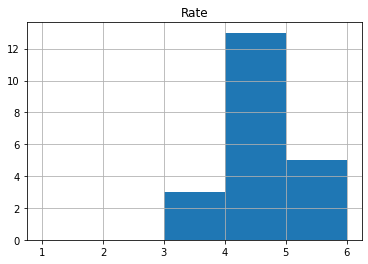

In [41]:
# olhando para a distribuicao dos dados...
hist = data_nr.hist(bins=np.arange(1,7))

### 5) Resumo e considerações finais

Bases de dados reais possuem problemas relacionados à coleta que não podem ser negligenciados

Parte importante do trabalho do cientista de dados é reconhecer esses problemas

**Dados faltantes** é um desses problemas e pode ocorrer em três tipos principais
* Completamente Aleatório - MCAR
* Aleatório (condicionalmente) - MAR
* Não aleatório

A abordagem para tratar cada caso deve ser diferente!

### 6) Outliers e dados errôneos

Vamos estudar os problemas: **Outliers e informacoes errôneas** utilizando um conjunto de dados de natalidade em uma maternidade, e que contém os seguintes atributos relativos aos nascidos:
* sexo, 
* peso do nascimento (em gramas), 
* idade gestacional (em semanas),
* mês do nascimento,
* ano do nascimento.

#### 6.1) Tipos de *outliers*

Também chamados de pontos "fora-da-curva" ou aberrantes. Os pontos não-outliers são às vezes chamados de inliers pois recaem "dentro" do esperado.

1. Globais ou anomalias de ponto
2. Contextuais ou condicionais
3. Coletivos

In [44]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

data = pd.read_csv("D:/Dropbox/OneDrive/06 - MBA USP/04 - Tratamento de dados/03 - Bases/TACTD_01-BCE_Outliers_Err_Desbal.csv")

print("Número de observacoes na base de dados: ", data.shape[0])
data.head()

Número de observacoes na base de dados:  72


,Sex,Weight,Gestational age,Month,Year
0,F,3490,38,11,2016
1,M,3650,39,11,2016
2,M,2740,34,11,2016
3,F,3380,39,12,2016
4,F,3820,38,12,2016


In [45]:
# vamos explorar a estatística descritiva dos dados!
data.describe()

,Weight,Gestational age,Month,Year
count,72.000000,72.000000,72.000000,72.000000
mean,3347.569444,37.666667,4.347222,2294.611111
std,625.807643,2.264235,3.600312,2357.042552
min,320.000000,32.000000,1.000000,2016.000000
25%,3100.000000,36.000000,2.000000,2017.000000
50%,3460.000000,38.000000,3.000000,2017.000000
75%,3682.500000,39.000000,5.000000,2017.000000
max,4810.000000,43.000000,12.000000,22017.000000


### 6.1.1) **Globais ou anomalias de ponto**: 

São ocorrências de valores *individuais* muito diferentes da maior parte dos dados disponíveis.

    Uma forma simples de identificar é gerar gráficos de caixa (ou *boxplots*) dos atributos/colunas da base de dados. Esse gráfico dá uma distribuição global dos dados e permite identificar aqueles cujo valor recaem fora da caixa que representa 50% dos dados, ou mesmo dos dados como um todo. 
    
    Idealmente, grafamos cada variável individualmente, pois elas tem intervalos de valores distintos! 
    * por exemplo, enquanto o peso está definido ao redor de milhares de gramas, a idade gestacional é em dezenas de semanas


<AxesSubplot:>

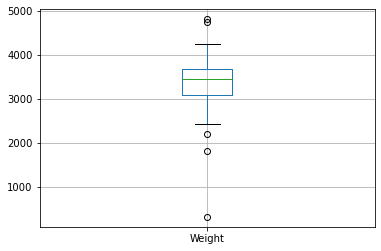

In [46]:
data.boxplot(column=['Weight'])

Notamos que a maior parte do peso está ao redor de 2500 e 4500, mas temos pontos bem distantes. Vamos tentar encontrá-los:

In [47]:
data[(data['Weight'] <= 2400) | (data['Weight'] >= 4300)]

,Sex,Weight,Gestational age,Month,Year
6,M,320,38,12,2016
19,F,2200,33,1,2017
38,M,4750,43,2,2017
41,F,4810,37,3,2017
45,F,1825,32,3,2017


Nessa primeira verificação, nota-se que a linha 6 possui um valor muito baixo (320 gramas) o qual é certamente um **outlier global** mas provavelmente é também um **dado errôneo**!

O motivo pode ser um erro de digitação ou inputação nesse caso. Se não quisermos prejudicar a análise, é preciso confirmar esse dado: se estiver disponível em outro base de dados ou meio físico, ou então descartá-lo.

In [48]:
# vamos definir como valor Not-a-number
data.loc[6,'Weight'] = np.NaN

Quanto as demais linhas, notamos valores altos (próximos a 4800) e baixos (1950). Nesses casos, parecem ser valores inputados corretamente e verdadeiros. 

Porém por desviar grandemente da maior parte dos dados são considerados também **outliers globais**.

No entanto, não iremos removê-lo a princípio pois não se tratam de dados errôneos.

Mostrando novamente o boxplot temos a distribuição dos dados sem o valor errôneo, e os 4 outliers globais indicados por círculos.

<AxesSubplot:>

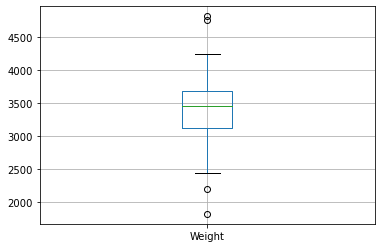

In [49]:
data.boxplot(column=['Weight'])

Dados errôneos podem aparecer não apenas na forma de outliers, mas também fora do padrão determinado. Por exemplo, vamos explorar a coluna relativa ao sexo do bebê, utilizando histograma e valores únicos.

<AxesSubplot:>

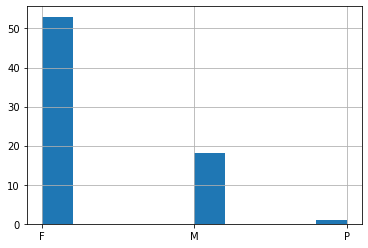

In [50]:
data['Sex'].hist()

In [51]:
data['Sex'].unique()

array(['F', 'M', 'P'], dtype=object)

Notamos um valor **P** que não pertence ao que é esperado. Esse dado foi corrompido de alguma forma e representa um dado **errôneo**. Devemos desconsiderá-lo, tornando-o um dado faltante.

In [52]:
data[data['Sex'] == 'P']

,Sex,Weight,Gestational age,Month,Year
16,P,3600.0,36,1,2017


<AxesSubplot:>

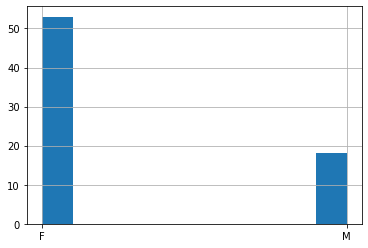

In [53]:
data.loc[16,'Sex'] = np.NaN
data['Sex'].hist()

### 6.1.2)  **Contextuais**: 

São valores que, observados isoladamente podem não ser anômalos, mas que ao observar o contexto, sim!

    * Em dados **independentes e identicamente distribuídos**, na qual um exemplo (nascimento de um bebê) não afeta os próximos exemplos observados, como é o caso desse exemplo, temos que identificar o componente contextual.
    
    * Em dados **sequenciais** (como séries temporais, texto), em que uma observação influencia a próxima, o contexto é quase sempre o aspecto temporal/sequencial.
    
No nosso exemplo, podemos observar se há uma anomalia de peso com relação à idade gestacional!

Vamos considerar por exemplo que:
* bebês nascidos entre 38 e 42 semanas possuem tamanho normal se estiverem aproximadamente entre 2500 e 4000 gramas.
    
    Assim, podemos buscar por **outliers contextuais**, em que o peso saia fora desse intervalo dentro do período gestacional indicado.
    
    Podemos usar busca por fatiamento da base, e também *boxplots*

In [54]:
d_term = data[(data['Gestational age'] >= 38) & (data['Gestational age'] <= 42)]

# buscando por anomalias contextuais
d_term[ (d_term['Weight'] < 2500) | (d_term['Weight'] > 4000) ]

,Sex,Weight,Gestational age,Month,Year
62,F,4240.0,41,5,2017


<AxesSubplot:>

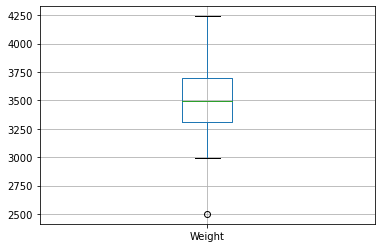

In [55]:
d_term.boxplot(column=['Weight'])

É interessante notar que o *boxplot* mostrou um outlier em 2500 gramas, enquanto nossa busca específica retornou apenas 4240 gramas em 41 semanas!

Vamos inspecionar esse caso:

In [56]:
d_term[ (d_term['Weight'] <= 2500)]

,Sex,Weight,Gestational age,Month,Year
25,M,2500.0,40,1,2017


Aqui, temos um caso limítrofe e precisamos da ajuda de especialistas para decidir o que significa esse *outlier*

### 6.1.3) **Coletivos**: 

Um conjunto de observacões cujos valores, quando analisados em grupo, indicam um evento não usual.

    Em geral:
    * não são *outliers globais* pois seus valores recaem dentro da maior parte dos dados globalmente
    
    * não são *outliers contextuais* pois individualmente podem ser considerados normais quando observados num determinado contexto

No nosso exemplo, vamos analisar os dados relativos ao nascimento de bebês do sexo masculino e feminino, mês a mês.

In [57]:
data.groupby('Month')['Sex'].describe()

,count,unique,top,freq
Month,,,,
1,14,2,F,9
2,12,2,F,7
3,11,2,F,9
4,10,2,F,8
5,12,1,F,12
11,3,2,M,2
12,9,2,F,7


Observando a estatística descritiva acima, veja que no mês 5 há 12 ocorrências, mas apenas um único valor, **F**

Vamos visualizar:

In [58]:
data[data['Month'] == 5]

,Sex,Weight,Gestational age,Month,Year
60,F,2450.0,34,5,2017
61,F,3380.0,37,5,2017
62,F,4240.0,41,5,2017
63,F,3220.0,42,5,2017
64,F,3100.0,37,5,2017
65,F,3280.0,40,5,2017
66,F,4000.0,38,5,2017
67,F,4100.0,37,5,2017
68,F,3900.0,40,5,2017
69,F,3450.0,37,5,2017


De fato, observar apenas nascimento de bebês do sexo feminino em um determinado mês é um **outlier coletivo**.

Note que os valores de sexo e mês individualmente não indicam **outlier global**, e que, quando analisamos observacoes uma a uma, é normal que um bebê do sexo feminino nasca no mês 5, então também a análise individual não mostra **outlier contextual**.

Assim, apenas pela análise conjunta identificamos um comportamento de **outlier**.

## 7) Resumo

Reconhecer outliers pode ser muito útil para entender os dados, e isso pode levar a diferentes aplicacoes:

* detectar dados errôneos
* detectar anomalias que possam ser reportadas

No entanto, é preciso ter conhecimento do domínio para ir além dos outliers globais, capturando também os contextuais e coletivos.
